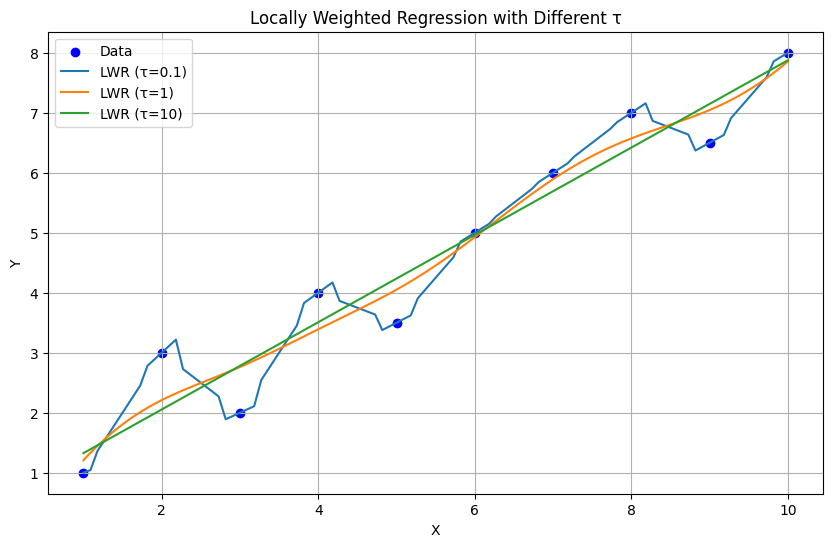

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Gaussian kernel for weight calculation
def gaussian_kernel(x, xq, tau):
    return np.exp(- (x - xq)**2 / (2 * tau**2))

# Step 2: Locally Weighted Regression Function
def lwr(X, y, xq, tau):
    X_b = np.c_[np.ones(len(X)), X]           # Add bias
    W = np.diag(gaussian_kernel(X, xq, tau))  # Weights
    theta = np.linalg.pinv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
    return np.array([1, xq]) @ theta          # Prediction

# Step 3: Sample dataset
X = np.arange(1, 11)
y = np.array([1, 3, 2, 4, 3.5, 5, 6, 7, 6.5, 8])
X_query = np.linspace(1, 10, 100)
taus = [0.1, 1, 10]

# Step 4: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')

for tau in taus:
    y_pred = [lwr(X, y, xq, tau) for xq in X_query]
    plt.plot(X_query, y_pred, label=f'LWR (τ={tau})')

plt.title('Locally Weighted Regression with Different τ')
plt.xlabel('X');
plt.ylabel('Y');
plt.legend(); 
plt.grid(); 
plt.show()


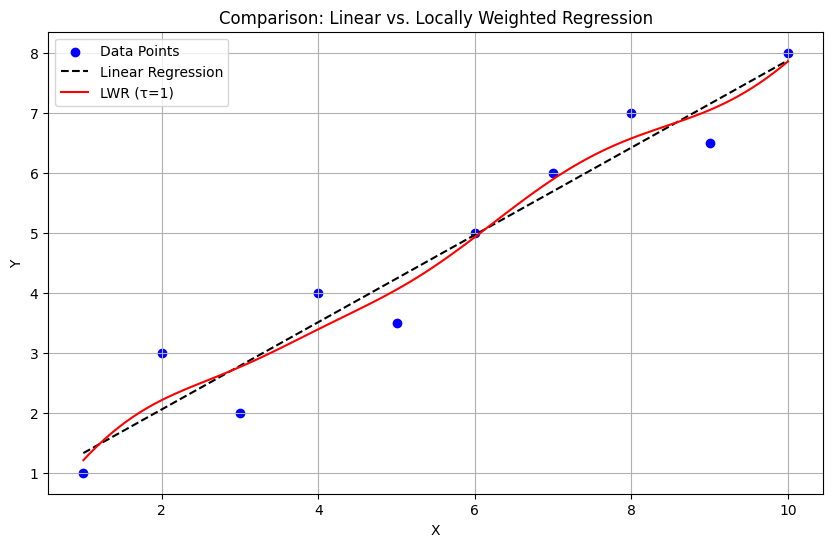

In [5]:


# Linear Regression
lin_reg = LinearRegression()
X_reshaped = X.reshape(-1, 1)
lin_reg.fit(X_reshaped, y)
y_lin = lin_reg.predict(X_query.reshape(-1, 1))

# Locally Weighted Regression (τ = 1)
y_lwr = np.array([lwr(X, y, xq, tau=1) for xq in X_query])

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_query, y_lin, color='black', linestyle='dashed', label='Linear Regression')
plt.plot(X_query, y_lwr, color='red', label='LWR (τ=1)')
plt.title("Comparison: Linear vs. Locally Weighted Regression")
plt.xlabel("X"); 
plt.ylabel("Y")
plt.legend(); 
plt.grid(); 
plt.show()


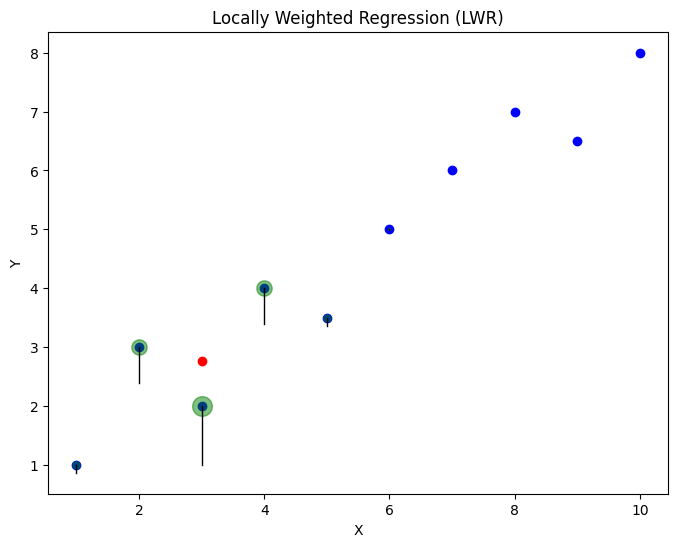

In [8]:
x_query = 3 # Point at which we perform LWR

# Bandwidth parameter
tau = 1.0

# Compute prediction
y_pred = lwr(X, y, x_query, tau)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.scatter(x_query, y_pred, color='red', label=f'Prediction at x={x_query}')

# Plot weights effect
weights = gaussian_kernel(X, x_query, tau)
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y[i] - weights[i]], 'k-', lw=1)
    plt.scatter(X[i], y[i], s=weights[i] * 200, color='green', alpha=0.5)
    plt.title("Locally Weighted Regression (LWR)") 
    plt.xlabel("X")
    plt.ylabel("Y")
